In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
import sys
sys.path.append('../../../src/')

In [6]:
import numpy as np
from PIL import Image

In [7]:
import matplotlib.pyplot as plt

In [8]:
from models.chen2017.transforms import *
import datasets.divahisdb as diva
import experiment.data as exd
from datasets.array import Tiles
import math
import torch

In [9]:
env = exd.Environment()

In [11]:
diva_dataset = diva.HisDBDataset(env.dataset('DIVA-HisDB'),gt=True)

In [12]:
tile_data = Tiles(env.dataset('Chen2017_np_tiles_balanced'))

In [13]:
tile_data.y

array([0, 0, 0, ..., 3, 3, 3])

In [14]:
class_count = np.unique(tile_data.y, return_counts=True)[1] 
# class_count / sum(class_count)
class_count

array([17475,   205, 11522, 17475])

In [15]:
n_label_max = sorted(np.unique(tile_data.data['y'], return_counts=True)[1])[-2]
idx = np.where(tile_data.y == 0)[0]
np.random.shuffle(idx)
idx = idx[:n_label_max]
idx = np.append(idx,np.where(tile_data.y == 1)[0][:n_label_max])
idx = np.append(idx,np.where(tile_data.y == 2)[0][:n_label_max])
idx = np.append(idx,np.where(tile_data.y == 3)[0][:n_label_max])
# tile_data.x[(idx[:10],)].shape

tile_data.y[idx]
np.unique(tile_data.y[idx], return_counts=True)
# idx
# n_label_max

(array([0, 1, 2, 3]), array([17475,   205, 11522, 17475]))

0

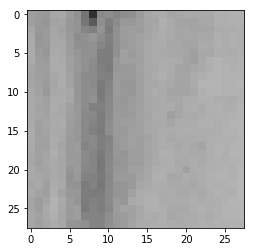

In [19]:
i = 6010
plt.imshow(tile_data[i][0],'gray')
tile_data[i][1]

In [21]:
std = np.std(tile_data.x)
mean = np.mean(tile_data.x)

In [22]:
mean, std

(168.10599408636776, 58.40416988825042)

In [23]:
type(tile_data.data['x'][2])

numpy.ndarray

In [24]:

tile_data.data.keys()

['x', 'y']

In [25]:
tile_data[i][0]

In [90]:
from models.chen2017.chennet import ChenNet as Model
model = Model(n_classes=4, in_channels=1, layers=1)

In [91]:
np.histogram(model.conv.conv0.weight.data)

(array([5, 2, 3, 5, 5, 3, 2, 6, 1, 4]),
 array([-0.33046457, -0.26410752, -0.19775047, -0.13139341, -0.06503636,
         0.00132069,  0.06767774,  0.13403479,  0.20039185,  0.2667489 ,
         0.33310595]))

In [92]:
model.conv

Sequential(
  (dropout): Dropout(p=0.5)
  (conv0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1))
)

In [94]:
tile_data.y

array([0, 0, 0, ..., 3, 3, 3])

In [118]:
np.sum(tile_data.y !=np.random.randint(0,4, size=tile_data.y.shape)) / len(tile_data.y)

0.7484360016439107

In [84]:

import json
import os
from pathlib import Path

import torch
import torchvision
import torchvision.transforms as transforms
from inferno.trainers.basic import Trainer
from inferno.trainers.callbacks.logging.tensorboard import TensorboardLogger

from models.chen2017.chennet import ChenNet as Model
import datasets.array as array
from experiment.data import Environment, TrainLog

env = Environment()
dataset_name  = 'Chen2017_np_tiles_balanced'
dataset_path = env.dataset(dataset_name)

mean =168.61987390394304
std =56.83193208713197

transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((mean, mean, mean), (std,std,std))
    ])

train_set = array.Tiles(dataset_path, transforms=transform)
test_set = array.Tiles(dataset_path, train=False, transforms=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32,
                                           shuffle=True, num_workers=2)

In [47]:
it = iter(train_loader)
batch = it.next()

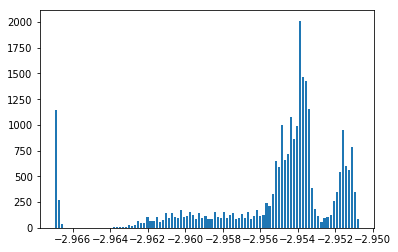

In [48]:
# plt.imshow(batch[0][0,0])
batch[1][0]
hist, bins = np.histogram(batch[0][:,0],bins=100)
# batch[0][:,0].shape
# plt.bar(hist[1],hist[0])
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
# plt.ylim([0,50])
plt.show()

In [49]:
loaded = Trainer()
loaded = loaded.load(from_directory=str(env.models_folder/ 'ChenNet'/'Chen2017_np_tiles_balanced'/'trained'/'ChenNet4_4_01522891722'))

/home/jakob/miniconda3/envs/master/lib/python3.6/site-packages/torch/serialization.py:325: SourceChangeWarning: source code of class 'models.chen2017.chennet.ChenNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [50]:
# model = Model(n_classes=4, in_channels=1, layers=2)
act = loaded.model(torch.autograd.Variable(batch[0]).cuda())
# batch[1]
act

Variable containing:
 0.5728 -3.2869 -0.0631  0.4484
 0.9800 -3.5435  0.3190  0.7983
 1.0476 -3.4508  0.4422  0.9680
 1.3996 -2.5392  0.7820  1.1178
 0.6751 -2.1479  0.2165  0.6539
 0.8837 -2.6932  0.0714  0.5466
 0.5203 -2.9325  0.0131  0.4312
 1.0526 -3.6437  0.5082  0.9645
 0.7319 -2.8433  0.4232  0.6146
 1.2388 -3.4754  0.7629  1.1621
 1.1083 -3.2793  0.4797  0.9631
 0.9737 -3.0555  0.4429  0.6787
 0.4067 -2.1644  0.0661  0.4070
 0.9494 -4.0407  0.4280  0.8809
 0.9015 -2.1358  0.4456  0.7631
 1.2288 -3.8084  0.6439  0.9369
 0.5517 -2.5022 -0.1046  0.3356
 0.7961 -1.7908  0.3634  0.5612
 1.2195 -2.3261  0.6363  1.0259
 1.1244 -4.0582  0.4810  0.8636
 0.8424 -2.8634  0.3539  0.6496
 0.8814 -2.9635  0.4827  0.6865
 0.9048 -3.2954  0.3798  0.6198
 0.9851 -2.8049  0.6086  0.9592
 0.8517 -3.5567  0.4640  0.7422
 0.4879 -2.6194 -0.0241  0.3574
 1.0140 -3.0685  0.6127  0.8005
 0.9728 -2.9938  0.3664  0.9154
 1.3506 -3.3606  0.8143  1.2177
 1.0961 -3.7948  0.6335  1.1085
 1.1791 -3.3460  0.

In [51]:
loss = torch.nn.CrossEntropyLoss()
loss(act, torch.autograd.Variable(batch[1]).cuda())

Variable containing:
 1.1038
[torch.cuda.FloatTensor of size 1 (GPU 0)]

In [253]:
!ls /media/jakob/bigdata/models/thesis/ChenNet/Chen2017_np_tiles_balanced/trained/ChenNet2_4_01522868516/

latest


In [82]:
img_set = Tiles(dataset_path)
img_set[14000][0]

In [54]:
import itertools as it

In [92]:
path = env.dataset('tile_img')
n = 6000
positions = np.array([],dtype=np.int)
for i in range(4):
    pos = np.where(img_set.y == i)[0]
    np.random.shuffle(pos)
    pos = pos[:n]
    positions = np.concatenate((positions, pos))
img_set.y[(positions,)]
for i in positions:
    img, y = img_set[i]
    class_folder = path / str(y)
    class_folder.mkdir(exist_ok=True,parents=True)
    img.save(class_folder / 'img{}.jpg'.format(i))

In [83]:
path

PosixPath('/media/jakob/bigdata/datasets/tile_img')

In [79]:
len(img_set.y)

46677

In [85]:
path = path = env.dataset('tile_img')

In [89]:
env.config

{'datasets': '/media/jakob/bigdata/datasets/',
 'models': '/media/jakob/bigdata/models/thesis',
 'project': '/home/jakob/htw/imi-master-thesis'}

In [91]:

list(range(1))

[0]